In [6]:
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt 
from sklearn.svm import LinearSVC

## Problem 2

In [21]:
X = np.array([[2],[1.5],[0.5],[-0.5]])
y = np.array([[1],[1],[-1],[-1]])

w = np.linalg.inv(X.T@X)@X.T@y
y_pred = np.sign(X@w)
print("b: \n", y_pred == y) 
# Yes it wrongly classifies x3

X_1 = np.array([[2,1],[1.5,1],[0.5,1],[-0.5,1]])
w_1 = np.array([[2],[-2]])
y_pred_1 = np.sign(X_1@w_1)
print("c: \n", y_pred_1 == y) 

X_2 = np.array([[2],[1.5],[0.5],[-5]])
y = np.array([[1],[1],[-1],[-1]])

w_2 = np.linalg.inv(X_2.T@X_2)@X_2.T@y
y_pred_2 = np.sign(X_2@w_2)
print("d: \n", y_pred_2 == y) 

X_3 = np.array([[2,1],[1.5,1],[0.5,1],[-5,1]])
w_3 = np.array([[2],[-2]])
y_pred_3 = np.sign(X_3@w_3)
print("e: \n", y_pred_3 == y) 

b: 
 [[ True]
 [ True]
 [False]
 [ True]]
c: 
 [[ True]
 [ True]
 [ True]
 [ True]]
d: 
 [[ True]
 [ True]
 [False]
 [ True]]
e: 
 [[ True]
 [ True]
 [ True]
 [ True]]


## Problem 3 

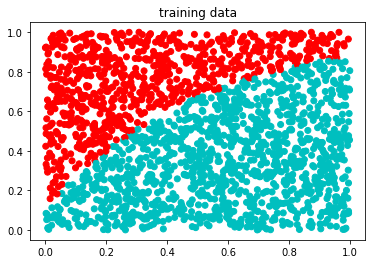

In [22]:
in_data = loadmat('classifier_data.mat')

x_train = in_data['x_train']
x_eval = in_data['x_eval']
y_train = in_data['y_train']
y_eval = in_data['y_eval']

n_eval = np.size(y_eval)
n_train = np.size(y_train)

plt.scatter(x_train[:,0],x_train[:,1], color=['c' if i==-1 else 'r' for i in y_train[:,0]])
plt.title('training data')
plt.show()

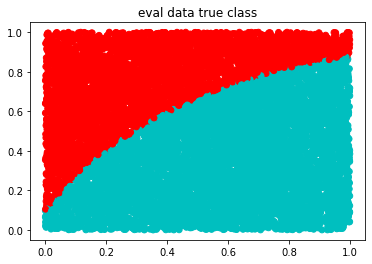

In [23]:
plt.scatter(x_eval[:,0],x_eval[:,1], color=['c' if i==-1 else 'r' for i in y_eval[:,0]])
plt.title('eval data true class')
plt.show()

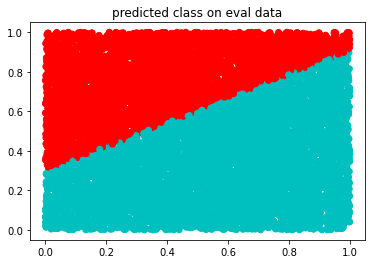

In [31]:
## Classifier 1
x_train_1 = np.hstack(( x_train, np.ones((n_train,1)) ))
x_eval_1 = np.hstack(( x_eval, np.ones((n_eval,1)) ))

# Train classifier using linear SVM from SK Learn library
clf = LinearSVC(random_state=0, tol=1e-8)
clf.fit(x_train_1, np.squeeze(y_train))
# w_opt = clf.coef_.transpose()

#uncomment this line to use least squares classifier
w_opt = np.linalg.inv(x_train_1.T@x_train_1)@x_train_1.T@y_train  

y_hat_outlier = np.sign(x_eval_1@w_opt)
plt.scatter(x_eval[:,0],x_eval[:,1], color=['c' if i==-1 else 'r' for i in y_hat_outlier[:,0]])
plt.title('predicted class on eval data')
plt.show()

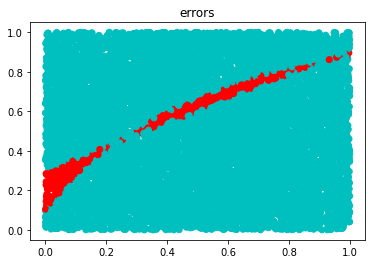

Errors: 495


In [32]:
error_vec = [0 if i[0]==i[1] else 1 for i in np.hstack((y_hat_outlier, y_eval))]
plt.scatter(x_eval[:,0],x_eval[:,1], color=['c' if i==0 else 'r' for i in error_vec])
plt.title('errors')
plt.show()

print('Errors: '+ str(sum(error_vec)))
# a : 1213 errors
# b : 495 errors

## Add correct points far from boundary 

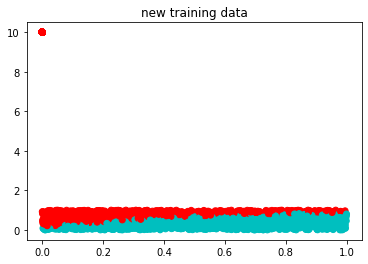

In [33]:
## create new, correctly labeled points 
n_new = 1000 #number of new datapoints
x_train_new = np.hstack((np.zeros((n_new,1)), 10*np.ones((n_new,1))))
y_train_new = np.ones((n_new,1))

## add these to the training data
x_train_outlier = np.vstack((x_train,x_train_new))
y_train_outlier = np.vstack((y_train,y_train_new))
plt.scatter(x_train_outlier[:,0],x_train_outlier[:,1], color=['c' if i==-1 else 'r' for i in y_train_outlier[:,0]])
plt.title('new training data')
plt.show()

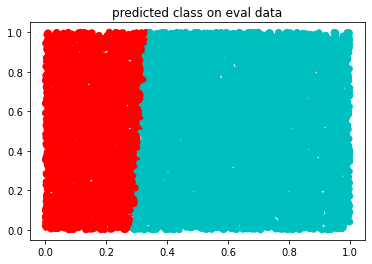

In [36]:
x_train_outlier_1 = np.hstack((x_train_outlier, np.ones((n_train+n_new,1)) ))
x_eval_1 = np.hstack((x_eval, np.ones((n_eval,1)) ))

#Train classifier using off the shelf SVM from sklearn
clf = LinearSVC(random_state=0, tol=1e-5)
clf.fit(x_train_outlier_1, np.squeeze(y_train_outlier))
# w_opt_outlier = clf.coef_.transpose()

#uncomment this line to use least squares classifier
w_opt_outlier = np.linalg.inv(x_train_outlier_1.T@x_train_outlier_1)@x_train_outlier_1.T@y_train_outlier

y_hat_outlier = np.sign(x_eval_1@w_opt_outlier)
plt.scatter(x_eval[:,0],x_eval[:,1], color=['c' if i==-1 else 'r' for i in y_hat_outlier[:,0]])
plt.title('predicted class on eval data')
plt.show()

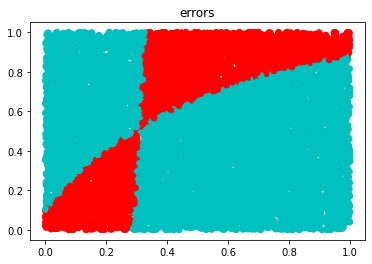

Errors: 2668


In [37]:
error_vec = [0 if i[0]==i[1] else 1 for i in np.hstack((y_hat_outlier, y_eval))]
plt.scatter(x_eval[:,0],x_eval[:,1], color=['c' if i==0 else 'r' for i in error_vec])
plt.title('errors')
plt.show()

print('Errors: '+ str(sum(error_vec)))

In [ ]:
# d : 1213 errors with hinge loss but 2668 with square error. The decision boundary for hinge loss is the same.
# The decision boundary with square error loss seems to be a vertical line almost with no slope.

# e: With outliers the hinge loss function works the same, but although thee square error does work better without
# outliers with them it work worst